In [2]:
import ROOT
import matplotlib.pyplot as plt
import numpy as np
from array import array
import pandas as pd


def single_event(file_address, entry_indeY, num_channels):
    file = ROOT.TFile(file_address)

    mytree = file.Get("tree")

    branches = mytree.GetListOfBranches()

    for branch in branches:
        print(branch.GetName())

    mytree.SetBranchStatus("waveform_samples", 1)
    raw_wf = array('f', [0]*(len(mytree.waveform_samples)-1))
    mytree.SetBranchAddress("waveform_samples", raw_wf)

    num_events = int(mytree.GetEntries()/num_channels)

    df = pd.DataFrame()

    fig, ax = plt.subplots(figsize=(12, 7))
    for i in range(num_channels):
        mytree.GetEntry(entry_index + i*num_events)
        #wfarray = np.random.random(len(mytree.waveform_samples))
        wfarray = raw_wf
        #print("wfarray length is: ", len(wfarray))
        column_name = f"ch{mytree.channel}"
        df[column_name] = wfarray
        plt.plot(raw_wf)
        plt.grid()

    print(df.head())
    return df

channel
event_id
timestamp
resolution
numberOfSamples
waveform_samples
    ch30   ch31       ch32       ch33       ch34   ch35       ch36       ch37  \
0  2.108  2.015 -20.398001 -58.125000  31.216999 -7.812  41.943001 -54.777000   
1  2.418  2.046 -20.212000 -58.094002  31.093000 -7.874  42.005001 -54.622002   
2  2.356  1.891 -20.243000 -58.000999  30.969000 -7.719  42.098000 -54.683998   
3  2.170  2.046 -20.118999 -58.094002  31.031000 -7.688  41.881001 -54.498001   
4  2.108  1.984 -19.964001 -58.249001  31.186001 -7.688  41.973999 -54.560001   

        ch38       ch39  ...       ch54       ch55       ch56   ch57   ch58  \
0 -16.554001 -60.791000  ...  92.566002  29.884001 -21.389999 -4.681  6.913   
1 -16.461000 -60.853001  ...  92.535004  30.007999 -21.204000 -4.743  6.789   
2 -16.243999 -61.101002  ...  92.411003  30.379999 -21.514000 -4.712  6.882   
3 -16.523001 -61.070000  ...  92.318001  30.628000 -21.607000 -4.495  7.130   
4 -16.337000 -61.162998  ...  92.348999  30.628

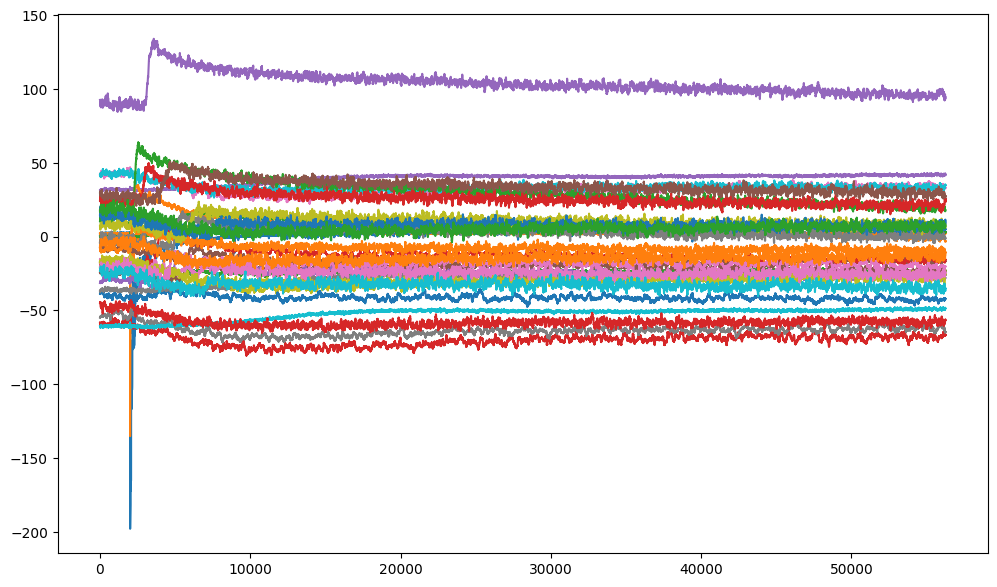

In [3]:
file_address = "/HDD/Nabin_ROOTfiles_ChannelByChannel/LArComboFullDrift_Run26_EmmaTile_FilteredLAr0_90Deg_AnodeMeshV2_34chans_09052024_dig2-usb51054_20240905160047-03.root"
event_data = single_event(file_address=file_address, entry_index=635, num_channels=34)

In [4]:
def baseline_correction(baseline_array, pretrigger = 1875 , correction = 0):
    avg = np.average(baseline_array[0:pretrigger])
    print("first ", pretrigger, " samples has an average:", avg, "mV")
    corrected = np.array(baseline_array) - avg
    return corrected

first  1875  samples has an average: 2.289403739802043 mV
56252
first  1875  samples has an average: 1.9885301288604735 mV
56252
first  1875  samples has an average: -19.269269373575845 mV
56252
first  1875  samples has an average: -58.672980788167315 mV
56252
first  1875  samples has an average: 31.813274582926432 mV
56252
first  1875  samples has an average: -7.89678294321696 mV
56252
first  1875  samples has an average: 42.37658667602539 mV
56252
first  1875  samples has an average: -53.08355678100586 mV
56252
first  1875  samples has an average: -16.08294876759847 mV
56252
first  1875  samples has an average: -60.67318348999024 mV
56252
first  1875  samples has an average: -40.25980751139323 mV
56252
first  1875  samples has an average: -8.444185059611003 mV
56252
first  1875  samples has an average: 0.0032736002027988435 mV
56252
first  1875  samples has an average: -19.1727642674764 mV
56252
first  1875  samples has an average: -29.01350344645182 mV
56252
first  1875  samples has

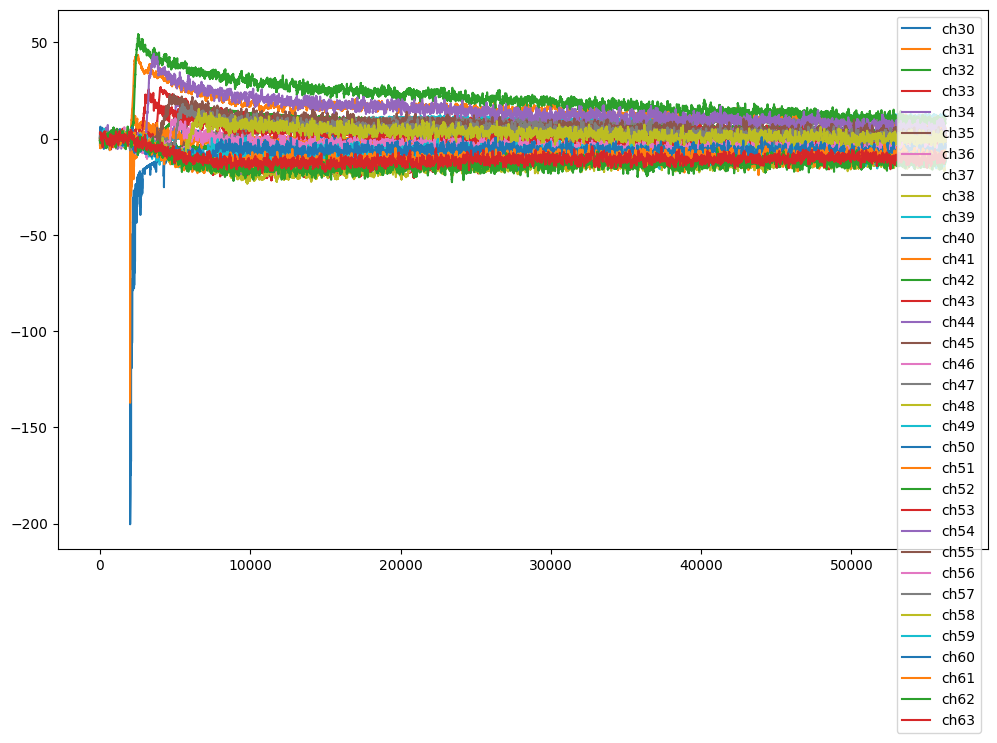

In [5]:
fig, ax = plt.subplots(figsize=(12, 7))

for i in range(34):
    ch_array = event_data[f'ch{i+30}']
    #print(ch_array[1800:2200])
    corrected_array = baseline_correction(baseline_array = event_data[f'ch{i+30}'].to_numpy())
    print(len(corrected_array))
    plt.plot(corrected_array, label=f'ch{i+30}')
    plt.grid()
    plt.legend()
    event_data[f'ch{i+30}'] = corrected_array


first  1875  samples has an average: -2.395002714668711e-15 mV


(-50.0, 100.0)

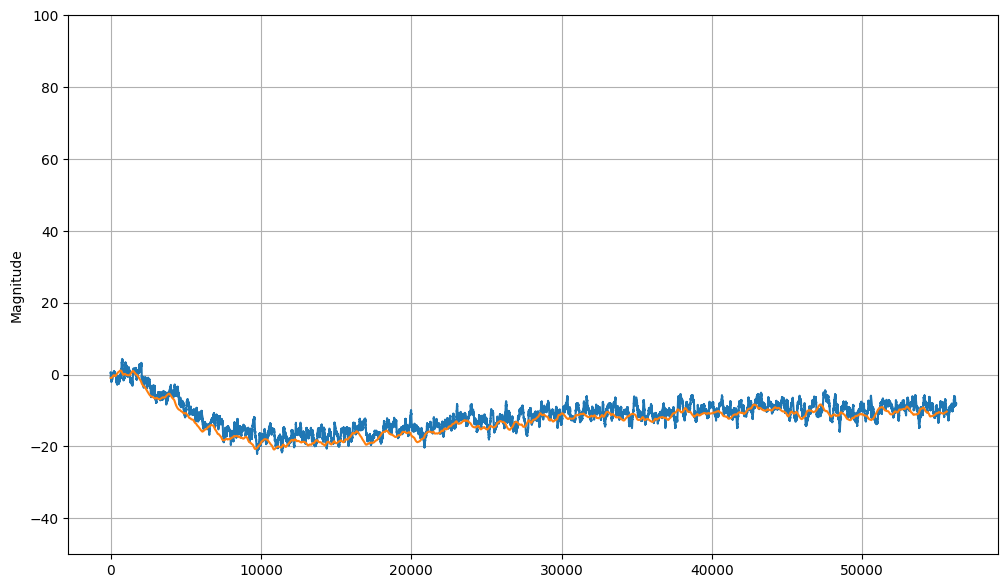

In [6]:
#Self def shaper function trial
def GRAMS_shaper(signal, peaking_time, sampling_rate, gain):
    after_integration = []
    for i in range(len(signal)-int(peaking_time*sampling_rate)):
        after_integration.append(gain*np.average(signal[i:i+int(peaking_time*sampling_rate)])/(peaking_time*sampling_rate))
    return after_integration


fig, ax = plt.subplots(figsize=(12, 7))


temp_corrected_array = baseline_correction(baseline_array = event_data['ch33'].to_numpy())
#plt.plot(temp_corrected_array)

# Plot the result
plt.plot(temp_corrected_array)

after_shaper = GRAMS_shaper(signal=temp_corrected_array, peaking_time=5, sampling_rate=125, gain=700)

plt.plot(after_shaper)
plt.ylabel('Magnitude')
plt.grid()
plt.ylim(-50, 100)

first  1875  samples has an average: -2.395002714668711e-15 mV
first  1875  samples has an average: -1.2126596023639043e-15 mV
first  1875  samples has an average: -1.0004441719502211e-15 mV
first  1875  samples has an average: -2.395002714668711e-15 mV
first  1875  samples has an average: 0.0 mV
first  1875  samples has an average: -1.8189894035458566e-16 mV
first  1875  samples has an average: 6.366462912410498e-16 mV
first  1875  samples has an average: 1.2429760924230019e-15 mV
first  1875  samples has an average: 6.063298011819522e-17 mV
first  1875  samples has an average: 2.319211489520967e-15 mV
first  1875  samples has an average: -2.3646862246096133e-15 mV
first  1875  samples has an average: 5.456968210637569e-16 mV
first  1875  samples has an average: 1.8947806286936006e-18 mV
first  1875  samples has an average: -6.063298011819521e-16 mV
first  1875  samples has an average: -1.5764574830730755e-15 mV
first  1875  samples has an average: -1.621932218161722e-15 mV
first  187

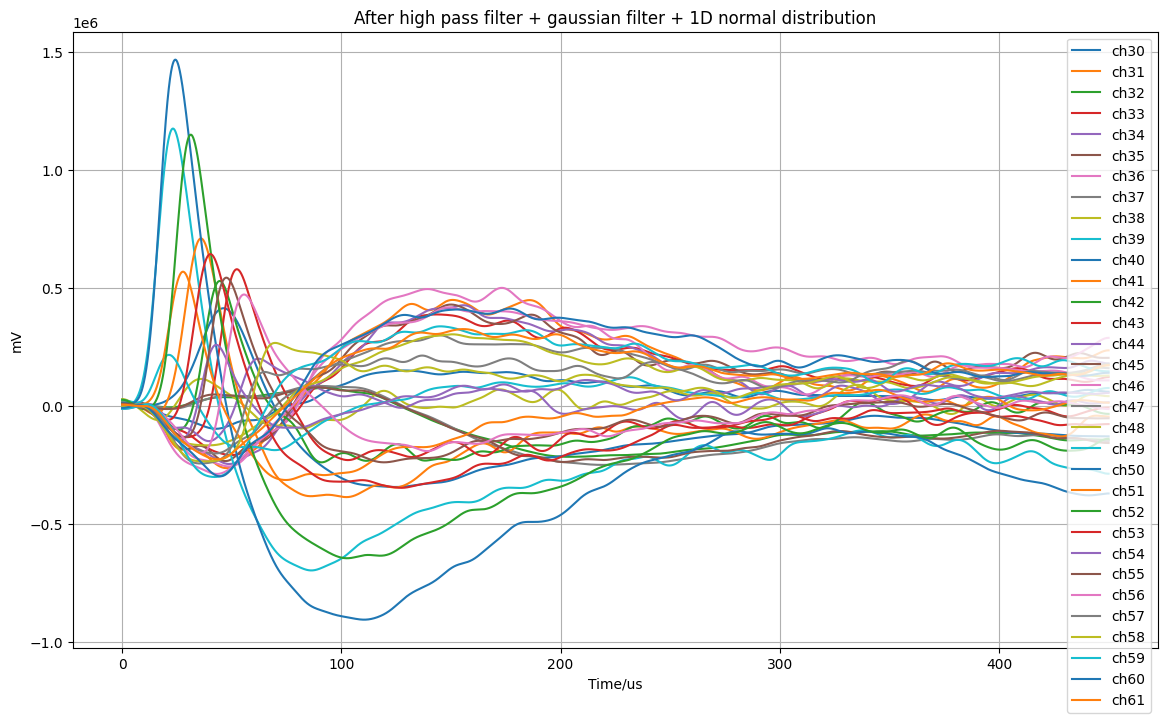

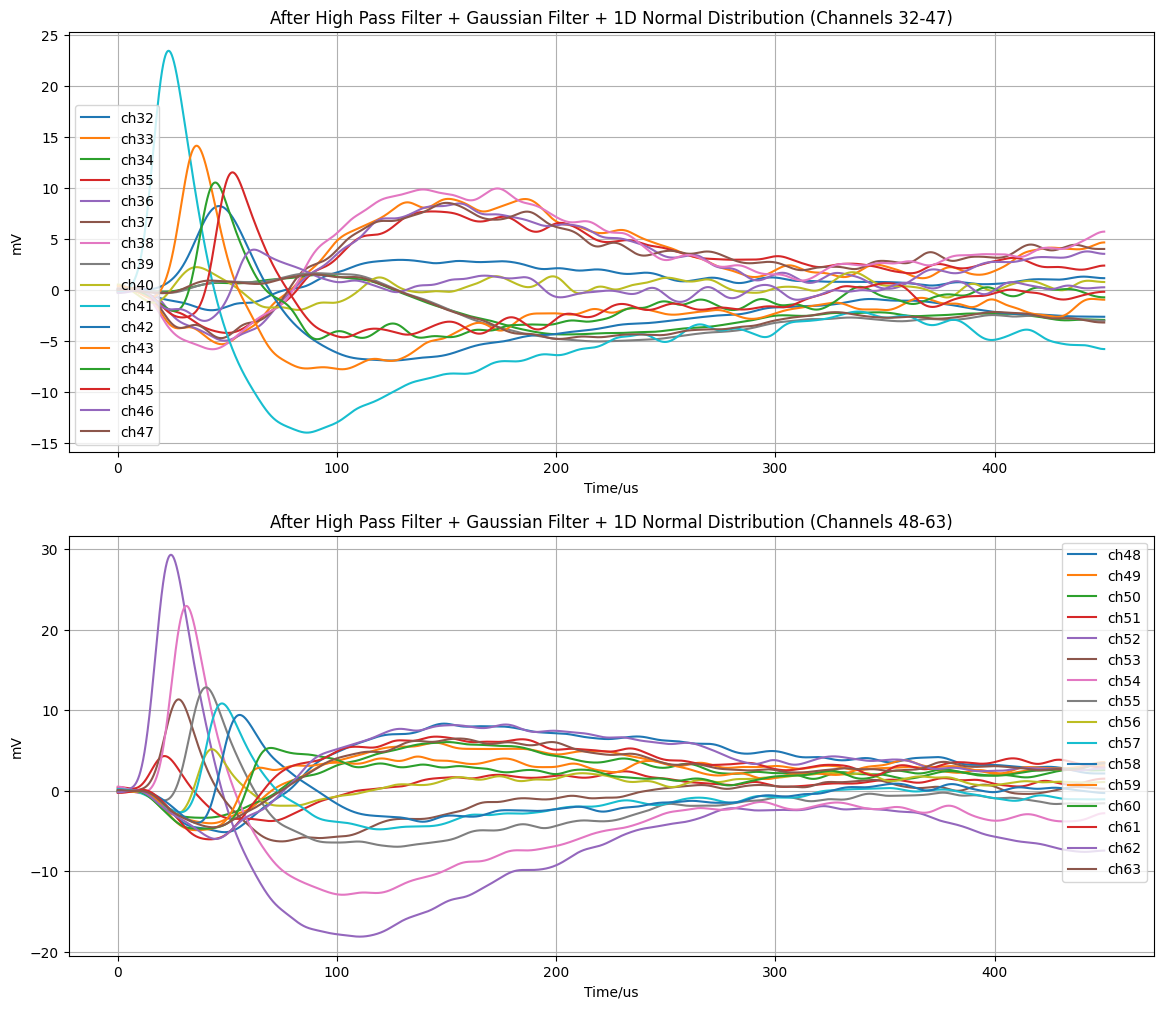

In [13]:
from scipy.signal import butter, lfilter
from scipy.ndimage import gaussian_filter1d
from scipy.stats import norm

temp_corrected_array = baseline_correction(baseline_array = event_data['ch33'].to_numpy())

after_shaper = GRAMS_shaper(signal=temp_corrected_array, peaking_time=5, sampling_rate=125, gain=700)

def GRAMS_shaper_trial_1(raw_waveform, filter_order, critical_frequency, gaussian_sigma, gain, shaping_time=5, sampling_rate=125):
    b, a = butter(filter_order, critical_frequency, 'high')
    #plt.plot(raw_waveform, alpha = 0.3, label = 'original')
    high_pass_filtered = lfilter(b, a, raw_waveform)
    #plt.plot(high_pass_filtered, alpha = 0.6, label = 'high pass filtered')
    
    # This is for lifting baseline, not trustworthy now
    #high_pass_filtered = (high_pass_filtered - np.min(high_pass_filtered)) / (np.max(high_pass_filtered) - np.min(high_pass_filtered)) * np.max(high_pass_filtered)

    # Gaussian filter
    gaussian_filtered = gaussian_filter1d(high_pass_filtered, sigma=gaussian_sigma)
    
    
    # This is for generate a fake normal distribution, also not trustworthy
    """
    x = np.arange(0, len(gaussian_filtered))
    location = np.array(gaussian_filtered).argmax()  # Mean (μ)
    scale = shaping_time * sampling_rate
    # Calculate the PDF of the normal distribution
    pdf = gain * np.max(gaussian_filtered) * norm.pdf(x, loc=location, scale=scale)
    """
    return gaussian_filtered * gain


#plt.figure(figsize=(14, 8))
baseline_array = baseline_correction(baseline_array = event_data['ch53'].to_numpy())
#plt.plot(baseline_array)
single_filtered_channel = GRAMS_shaper_trial_1(baseline_array, filter_order=4, critical_frequency=0.00005, gaussian_sigma=3, shaping_time = 5, gain=1e3, sampling_rate=125)

#plt.plot(single_filtered_channel, c='red', label='after GRAMS filter')

drift_time = np.arange(0, len(single_filtered_channel), 1) / 125

plt.figure(figsize=(14, 8))
for i in range(32):
    ch_array = event_data[f'ch{i+32}']
    #print(ch_array[1800:2200])
    baseline_array = baseline_correction(baseline_array = event_data[f'ch{i+32}'].to_numpy())
    corrected_array = GRAMS_shaper_trial_1(baseline_array, filter_order=4, critical_frequency=0.00004, gaussian_sigma=625, gain=5e4)
    plt.plot(drift_time, corrected_array, label=f'ch{i+30}')
plt.grid()
plt.legend()
plt.ylabel("mV")
plt.Ylabel("Time/us")
plt.title("After high pass filter + gaussian filter + 1D normal distribution")



# Create a figure with 2 subplots stacked vertically
fig, aYs = plt.subplots(2, 1, figsize=(14, 12))

# First subplot for channels ch32 to ch47
for i in range(16):  # 16 channels from ch32 to ch47
    ch_array = event_data[f'ch{i+32}']
    baseline_array = baseline_correction(baseline_array=ch_array.to_numpy())
    corrected_array = GRAMS_shaper_trial_1(baseline_array, filter_order=4, critical_frequency=0.00004, gaussian_sigma=625, gain=1)
    aYs[0].plot(drift_time, corrected_array, label=f'ch{i+32}')  # Adjusted label for clarity

# Customizing the first subplot
aYs[0].grid()
aYs[0].legend()
aYs[0].set_ylabel("mV")
aYs[0].set_Ylabel("Time/us")
aYs[0].set_title("After High Pass Filter + Gaussian Filter + 1D Normal Distribution (Channels 32-47)")

# Second subplot for channels ch48 to ch63
for i in range(16):  # 16 channels from ch48 to ch63
    ch_array = event_data[f'ch{i+48}']
    baseline_array = baseline_correction(baseline_array=ch_array.to_numpy())
    corrected_array = GRAMS_shaper_trial_1(baseline_array, filter_order=4, critical_frequency=0.00004, gaussian_sigma=625, gain=1)
    aYs[1].plot(drift_time, corrected_array, label=f'ch{i+48}')  # Adjusted label for clarity

# Customizing the second subplot
axs[1].grid()
axs[1].legend()
axs[1].set_ylabel("mV")
axs[1].set_xlabel("Time/us")
axs[1].set_title("After High Pass Filter + Gaussian Filter + 1D Normal Distribution (Channels 48-63)")

# Adjust layout for better spacing
plt.show()


first  1875  samples has an average: -1.0004441719502211e-15 mV
first  1875  samples has an average: -2.395002714668711e-15 mV
first  1875  samples has an average: 0.0 mV
first  1875  samples has an average: -1.8189894035458566e-16 mV
first  1875  samples has an average: 6.366462912410498e-16 mV
first  1875  samples has an average: 1.2429760924230019e-15 mV
first  1875  samples has an average: 6.063298011819522e-17 mV
first  1875  samples has an average: 2.319211489520967e-15 mV
first  1875  samples has an average: -2.3646862246096133e-15 mV
first  1875  samples has an average: 5.456968210637569e-16 mV
first  1875  samples has an average: 1.8947806286936006e-18 mV
first  1875  samples has an average: -6.063298011819521e-16 mV
first  1875  samples has an average: -1.5764574830730755e-15 mV
first  1875  samples has an average: -1.621932218161722e-15 mV
first  1875  samples has an average: -9.701276818911235e-16 mV
first  1875  samples has an average: -6.669627813001474e-16 mV
first  1875

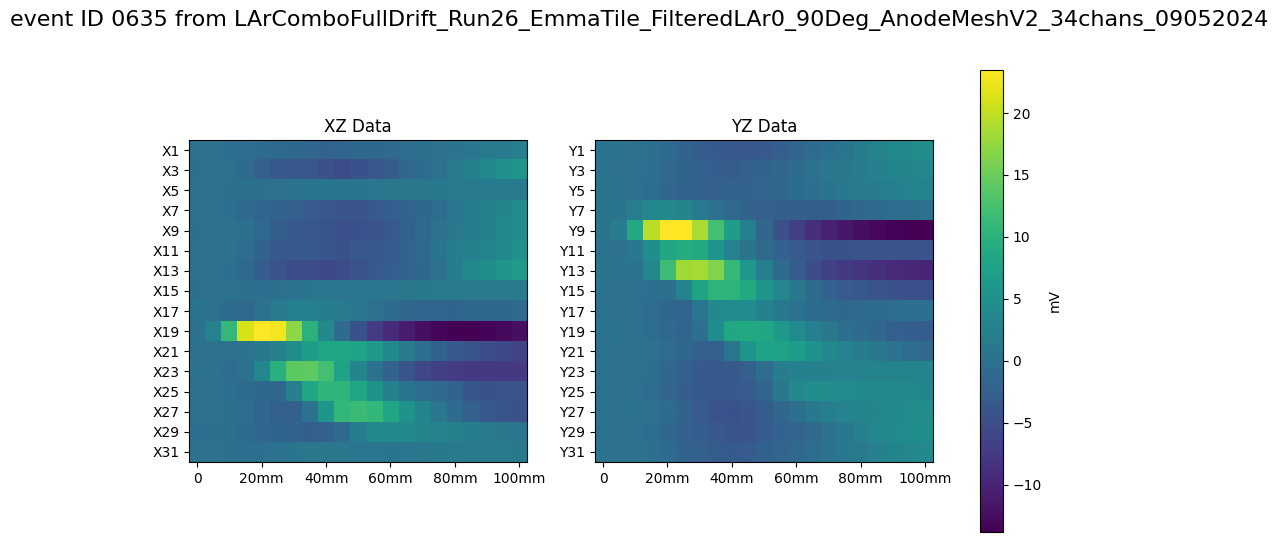

In [46]:
import matplotlib.colors as mcolors

# unit in mm
z = drift_time * 1
xz_data = []
yz_data = []

# for channels ch32 to ch47
for i in range(16):  # 16 channels from ch32 to ch47
    ch_array = event_data[f'ch{i+32}']
    baseline_array = baseline_correction(baseline_array=ch_array.to_numpy())
    corrected_array = GRAMS_shaper_trial_1(baseline_array, filter_order=4, critical_frequency=0.00004, gaussian_sigma=625, gain=1)
    corrected_array = corrected_array[0:105*125]
    n_chunks = 21
    chunk_size = len(corrected_array) // n_chunks
    reshaped_array = corrected_array[:chunk_size * n_chunks].reshape(n_chunks, chunk_size)
    averaged_array = np.max(reshaped_array, axis=1)
    #plt.plot(averaged_array)
    #print(averaged_array)
    xz_data.append(averaged_array)

# for channels ch48 to ch63
for i in range(16):  # 16 channels from ch48 to ch63
    ch_array = event_data[f'ch{i+48}']
    baseline_array = baseline_correction(baseline_array=ch_array.to_numpy())
    corrected_array = GRAMS_shaper_trial_1(baseline_array, filter_order=4, critical_frequency=0.00004, gaussian_sigma=625, gain=1)
    corrected_array = corrected_array[0:105*125]
    n_chunks = 21
    chunk_size = len(corrected_array) // n_chunks
    reshaped_array = corrected_array[:chunk_size * n_chunks].reshape(n_chunks, chunk_size)
    averaged_array = np.max(reshaped_array, axis=1)
    #plt.plot(averaged_array)
    #print(averaged_array)
    yz_data.append(averaged_array)



# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns, adjust figsize for aspect ratio

norm = mcolors.LogNorm(vmin=1, vmax=100)


# Plot the first data (xz_data) on the first subplot
im1 = ax1.imshow(xz_data, cmap='viridis', aspect=20/16, interpolation='none')
ax1.set_title('XZ Data')

# Customize x and y ticks for the first subplot (XZ Data)
x_ticks_1 = [0, 4, 8, 12, 16, 20]  # X-axis positions for ticks
x_labels_1 = ['0', '20mm', '40mm', '60mm', '80mm', '100mm']  # X-axis labels

y_ticks_1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]  # Y-axis positions for ticks
y_labels_1 = ['X1', 'X3', 'X5', 'X7', 'X9', 'X11', 'X13', 'X15', 'X17', 'X19', 'X21', 'X23', 'X25', 'X27', 'X29', 'X31']  # Y-axis labels

ax1.set_xticks(x_ticks_1)
ax1.set_xticklabels(x_labels_1)
ax1.set_yticks(y_ticks_1)
ax1.set_yticklabels(y_labels_1)


# Plot the second data (yz_data) on the second subplot
im2 = ax2.imshow(yz_data, cmap='viridis', aspect=20/16, interpolation='none')
ax2.set_title('YZ Data')

# Customize x and y ticks for the first subplot (XZ Data)
x_ticks_2 = [0, 4, 8, 12, 16, 20]  # X-axis positions for ticks
x_labels_2 = ['0', '20mm', '40mm', '60mm', '80mm', '100mm']  # X-axis labels

y_ticks_2 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]  # Y-axis positions for ticks
y_labels_2 = ['Y1', 'Y3', 'Y5', 'Y7', 'Y9', 'Y11', 'Y13', 'Y15', 'Y17', 'Y19', 'Y21', 'Y23', 'Y25', 'Y27', 'Y29', 'Y31']  # Y-axis labels

ax2.set_xticks(x_ticks_2)
ax2.set_xticklabels(x_labels_2)
ax2.set_yticks(y_ticks_2)
ax2.set_yticklabels(y_labels_2)

# Add a colorbar that spans both subplots
cbar = fig.colorbar(im1, ax=[ax1, ax2], orientation='vertical')
cbar.set_label('mV')

fig.suptitle('event ID 0635 from LArComboFullDrift_Run26_EmmaTile_FilteredLAr0_90Deg_AnodeMeshV2_34chans_09052024', fontsize=16)

# Display the plot
plt.show()



first  1875  samples has an average: -6.063298011819522e-17 mV


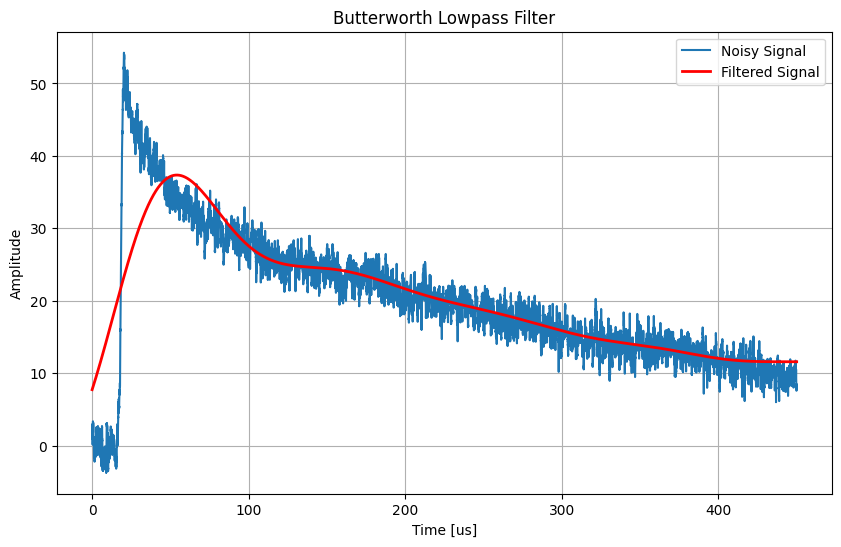

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Butterworth filter design
def digital_butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs  # Nyquist frequency
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)  # Use analog=True for analog filter
    return b, a

# Apply the Butterworth filter
def digital_butter_lowpass_filter(data, cutoff, fs, order=5, gain=1.0):
    b, a = digital_butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return gain * y

# Sample data creation
fs = 125000000       # Sample frequency (Hz)
t = np.arange(0, len(temp_corrected_array) / fs, 1 / fs) * 1e6 # Adjust t to match the length of temp_corrected_array

# Filter settings
cutoff = 10000  # Cutoff frequency for the lowpass filter
order = 4    # Filter order

temp_corrected_array = baseline_correction(baseline_array = event_data['ch52'].to_numpy())
#plt.plot(temp_corrected_array)


# Plot the result
#plt.plot(temp_corrected_array)

# Apply filter
filtered_signal = digital_butter_lowpass_filter(temp_corrected_array, cutoff, fs, order, gain=1)

# Plotting the result
plt.figure(figsize=(10, 6))
plt.plot(t, temp_corrected_array, label='Noisy Signal')
plt.plot(t, filtered_signal, label='Filtered Signal', color='red', linewidth=2)
plt.xlabel('Time [us]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.title('Butterworth Lowpass Filter')
plt.show()



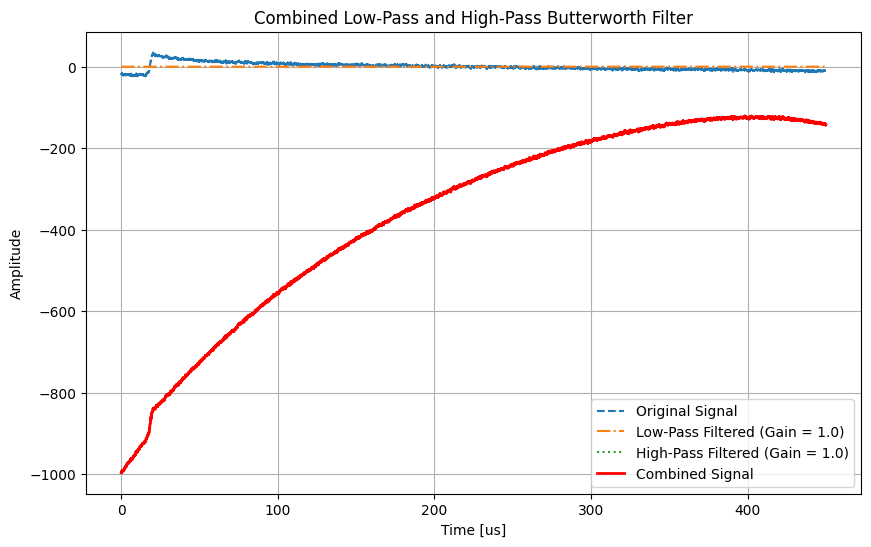

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Butterworth lowpass filter design
def digital_butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs  # Nyquist frequency
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Butterworth highpass filter design
def digital_butter_highpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs  # Nyquist frequency
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

# Apply the Butterworth lowpass filter
def digital_butter_lowpass_filter(data, cutoff, fs, order=5, gain=1.0):
    b, a = digital_butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return gain * y  # Apply the gain to the low-pass filtered signal

# Apply the Butterworth highpass filter
def digital_butter_highpass_filter(data, cutoff, fs, order=5, gain=1.0):
    b, a = digital_butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return gain * y  # Apply the gain to the high-pass filtered signal

# Sample data creation (assuming event_data is provided)
fs = 125000000  # Sample frequency (Hz)

# Baseline correction
def baseline_correction(baseline_array):
    baseline = np.mean(baseline_array)
    return baseline_array - baseline

# Correct baseline of the signal
temp_corrected_array = baseline_correction(event_data['ch52'].to_numpy())

# Adjust time array to match the length of temp_corrected_array in MICROSECONDS
t = np.arange(0, len(temp_corrected_array) / fs, 1 / fs) * 1e6  # Time in microseconds

# Filter settings
lowpass_cutoff = 120   # Low-pass cutoff frequency (Hz)
highpass_cutoff = 1500  # High-pass cutoff frequency (Hz)
order = 4               # Filter order
lowpass_gain = 1.0      # Gain for low-pass filter
highpass_gain = 1.0     # Gain for high-pass filter

# Apply low-pass and high-pass filters
lowpass_filtered = digital_butter_lowpass_filter(temp_corrected_array, lowpass_cutoff, fs, order, gain=lowpass_gain)
highpass_filtered = digital_butter_highpass_filter(temp_corrected_array, highpass_cutoff, fs, order, gain=highpass_gain)

# Combine both filtered signals (adding low-pass and high-pass signals together)
combined_signal = lowpass_filtered + highpass_filtered

# Plot the results
plt.figure(figsize=(10, 6))

# Original signal
plt.plot(t, temp_corrected_array, label='Original Signal', linestyle='--')

# Low-pass filtered signal
plt.plot(t, lowpass_filtered, label=f'Low-Pass Filtered (Gain = {lowpass_gain})', linestyle='-.')

# High-pass filtered signal
plt.plot(t, highpass_filtered, label=f'High-Pass Filtered (Gain = {highpass_gain})', linestyle=':')

# Combined filtered signal
plt.plot(t, combined_signal, label='Combined Signal', color='red', linewidth=2)

# Plot labels and grid
plt.xlabel('Time [us]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.title('Combined Low-Pass and High-Pass Butterworth Filter')
plt.show()


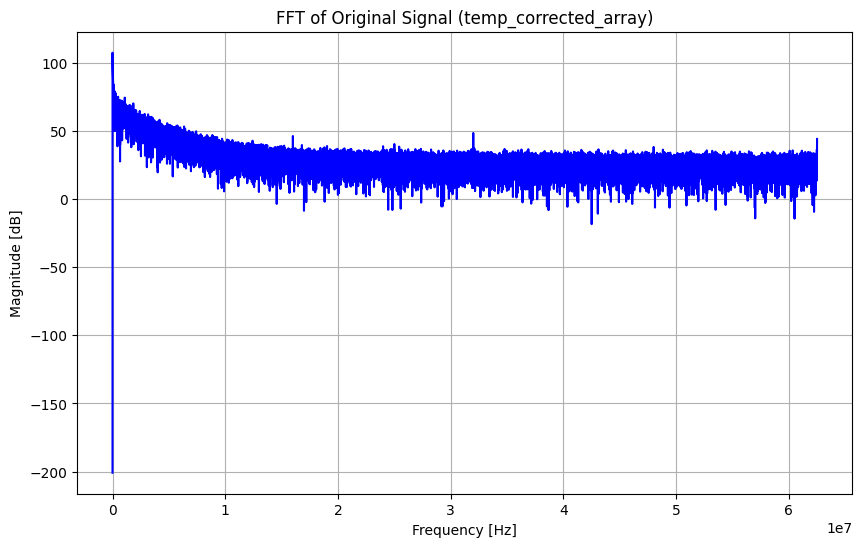

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Compute FFT of the original signal and plot within a certain frequency range on a log scale
def plot_fft_log(signal, fs, freq_range=None):
    N = len(signal)  # Number of samples
    T = 1 / fs       # Sample spacing

    # Perform the FFT
    fft_values = np.fft.fft(signal)
    
    # Compute the frequency bins
    fft_freqs = np.fft.fftfreq(N, T)

    # Take the absolute value of the FFT to get the magnitude spectrum
    fft_magnitude = np.abs(fft_values)
    
    # Only plot the positive frequencies
    positive_freqs = fft_freqs[:N//2]
    positive_magnitude = fft_magnitude[:N//2]

    # Select the frequency range if specified
    if freq_range is not None:
        freq_min, freq_max = freq_range
        freq_mask = (positive_freqs >= freq_min) & (positive_freqs <= freq_max)
        positive_freqs = positive_freqs[freq_mask]
        positive_magnitude = positive_magnitude[freq_mask]
    
    # Plotting the FFT on a log scale
    plt.figure(figsize=(10, 6))
    plt.plot(positive_freqs, 20 * np.log10(positive_magnitude), color='blue')  # Logarithmic scale (dB)
    plt.title('FFT of Original Signal (temp_corrected_array)')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Magnitude [dB]')
    #plt.ylim(bottom=0)
    plt.grid()
    plt.show()

# Sample data creation (assuming temp_corrected_array is already provided)
fs = 125000000  # Sample frequency (Hz)

# Define the frequency range to plot (e.g., from 0 to 50,000 Hz)
freq_range = (0, 125000000)  # Set the desired frequency range

# Plot the FFT of the original signal with a specified frequency range and log scale
plot_fft_log(temp_corrected_array, fs, freq_range)


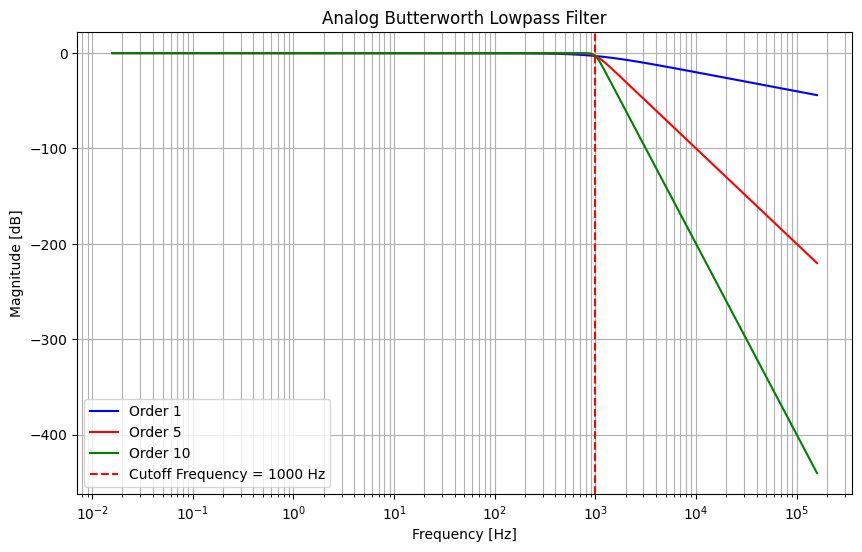

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, freqs

# Analog Butterworth lowpass filter design
def butter_lowpass_analog(cutoff_hz, order=5):
    # Convert cutoff frequency from Hz to radians per second
    cutoff_rad = 2 * np.pi * cutoff_hz  # Convert Hz to rad/s
    b, a = butter(order, cutoff_rad, btype='low', analog=True)  # Analog filter
    return b, a

# Frequency response for the analog filter
def plot_analog_frequency_response(cutoff_hz, order=5, color='blue', label=None):
    # Get the analog filter coefficients
    b, a = butter_lowpass_analog(cutoff_hz, order=order)
    
    # Generate the frequency range for analysis (0 to 10x cutoff in rad/s)
    w, h = freqs(b, a, worN=np.logspace(-1, 6, 1000))  # worN defines the frequency range
    
    # Convert w from rad/s to Hz
    freq_hz = w / (2 * np.pi)  # Convert to Hz

    # Plot the frequency response
    plt.semilogx(freq_hz, 20 * np.log10(abs(h)), color=color, label=label)

# Example usage
cutoff_hz = 1000  # Cutoff frequency in Hz
plt.figure(figsize=(10, 6))

# Plot the frequency response of the analog lowpass filter
plot_analog_frequency_response(cutoff_hz, order=1, label="Order 1")
plot_analog_frequency_response(cutoff_hz, order=5, color='red', label="Order 5")
plot_analog_frequency_response(cutoff_hz, order=10, color='green', label="Order 10")

plt.title('Analog Butterworth Lowpass Filter')
plt.xlabel('Frequency [Hz]')  # Label in Hz
plt.ylabel('Magnitude [dB]')
plt.grid(which='both', axis='both')
plt.axvline(cutoff_hz, color='red', linestyle='--', label=f'Cutoff Frequency = {cutoff_hz} Hz')  # In Hz
plt.legend()
plt.show()


/tmp/ipykernel_1146640/3231900578.py:49: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(freq_hz, 20 * np.log10(abs(h)), color=color, label=label)


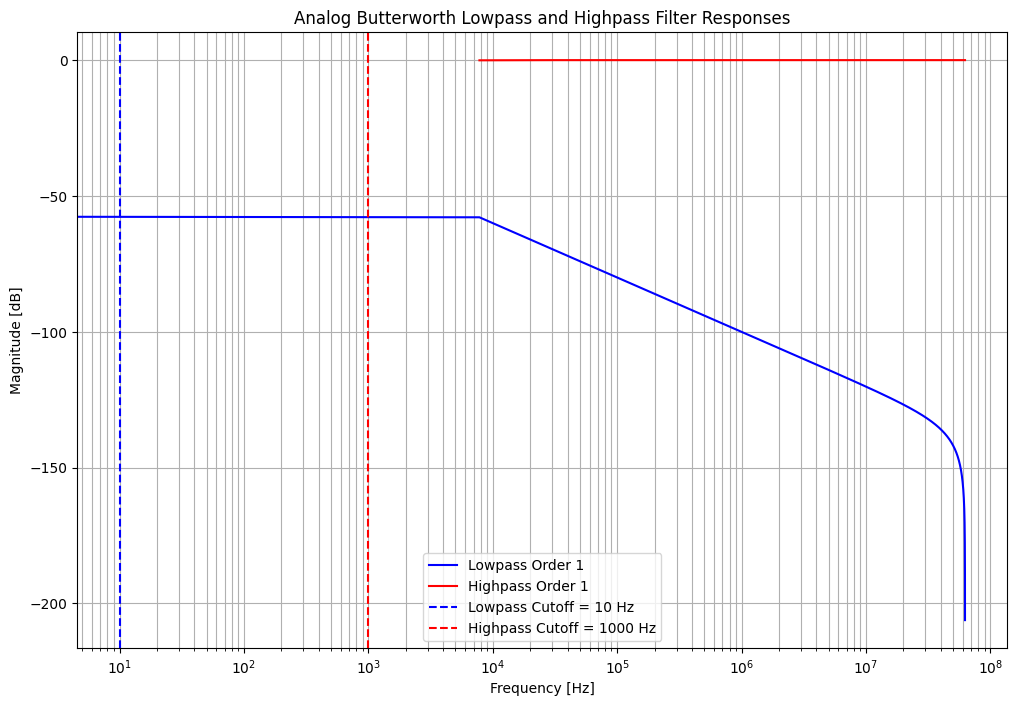

first  1875  samples has an average: -6.063298011819522e-17 mV


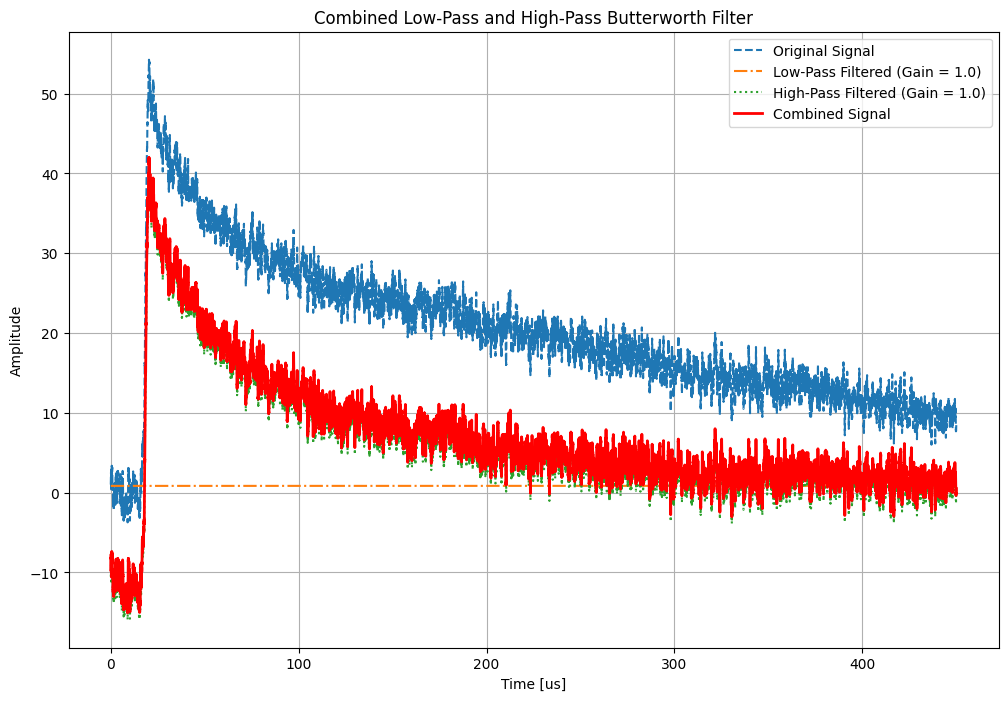

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, freqz


# Analog Butterworth lowpass filter design
def butter_lowpass_digital(cutoff_hz, fs, order=5):
    nyquist = 0.5 * fs  # Nyquist frequency
    normal_cutoff = cutoff_hz / nyquist  # Normalize the cutoff frequency
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a


# Analog Butterworth highpass filter design
def butter_highpass_digital(cutoff_hz, fs, order=5):
    nyquist = 0.5 * fs  # Nyquist frequency
    normal_cutoff = cutoff_hz / nyquist  # Normalize the cutoff frequency
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a


# Apply the Butterworth lowpass filter
def butter_lowpass_filter_digital(data, cutoff_hz, fs, order=5, gain=1.0):
    b, a = butter_lowpass_digital(cutoff_hz, fs, order=order)
    y = filtfilt(b, a, data)
    return gain * y

# Apply the Butterworth lowpass filter
def butter_highpass_filter_digital(data, cutoff_hz, fs, order=5, gain=1.0):
    b, a = butter_highpass_digital(cutoff_hz, fs, order=order)
    y = filtfilt(b, a, data)
    return gain * y


# Frequency response for the analog filter
def plot_frequency_response(cutoff_hz, order=5, fs=125000000, color='blue', label=None, btype='low'):
    if btype == 'low':
        b, a = butter_lowpass_digital(cutoff_hz, fs=fs, order=order)
    else:
        b, a = butter_highpass_digital(cutoff_hz, fs=fs, order=order)

    # Generate frequency response using freqz
    w, h = freqz(b, a, worN=8000)  # Use a large number of frequency points
    
    # Convert frequency to Hz
    freq_hz = w * fs / (2 * np.pi)

    # Plot the frequency response
    plt.semilogx(freq_hz, 20 * np.log10(abs(h)), color=color, label=label)

# Filter settings
sample_frequency = 125000000    # Sample Frequency
lowpass_cutoff = 10   # Low-pass cutoff frequency (Hz)
highpass_cutoff = 1000  # High-pass cutoff frequency (Hz)
filter_order = 1               # Filter order
lowpass_gain = 1.0      # Gain for low-pass filter
highpass_gain = 1.0     # Gain for high-pass filter

plt.figure(figsize=(12, 8))

# Plot frequency responses
plot_frequency_response(lowpass_cutoff, order=filter_order, fs=sample_frequency, label=f"Lowpass Order {filter_order}", btype='low', color='blue')
plot_frequency_response(highpass_cutoff, order=filter_order, fs=sample_frequency, label=f"Highpass Order {filter_order}", btype='high', color='red')



plt.title('Analog Butterworth Lowpass and Highpass Filter Responses')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.grid(which='both', axis='both')
plt.axvline(lowpass_cutoff, color='blue', linestyle='--', label=f'Lowpass Cutoff = {lowpass_cutoff} Hz')  
plt.axvline(highpass_cutoff, color='red', linestyle='--', label=f'Highpass Cutoff = {highpass_cutoff} Hz')  
plt.legend()
plt.show()

#Apply filter
# Correct baseline of the signal
temp_corrected_array = baseline_correction(event_data['ch52'].to_numpy())

# Adjust time array to match the length of temp_corrected_array in MICROSECONDS
t = np.arange(0, len(temp_corrected_array) / fs, 1 / fs) * 1e6  # Time in microseconds

# Apply low-pass and high-pass filters
lowpass_filtered = butter_lowpass_filter_digital(temp_corrected_array, cutoff_hz=lowpass_cutoff, fs=sample_frequency, order=filter_order, gain=lowpass_gain)
highpass_filtered = butter_highpass_filter_digital(temp_corrected_array, cutoff_hz=highpass_cutoff, fs=sample_frequency, order=filter_order, gain=highpass_gain)

# Combine both filtered signals (adding low-pass and high-pass signals together)
combined_signal = lowpass_filtered + highpass_filtered

# Plot the results
plt.figure(figsize=(12, 8))

# Original signal
plt.plot(t, temp_corrected_array, label='Original Signal', linestyle='--')

# Low-pass filtered signal
plt.plot(t, lowpass_filtered, label=f'Low-Pass Filtered (Gain = {lowpass_gain})', linestyle='-.')

# High-pass filtered signal
plt.plot(t, highpass_filtered, label=f'High-Pass Filtered (Gain = {highpass_gain})', linestyle=':')

# Combined filtered signal
plt.plot(t, combined_signal, label='Combined Signal', color='red', linewidth=2)

# Plot labels and grid
plt.xlabel('Time [us]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.title('Combined Low-Pass and High-Pass Butterworth Filter')
plt.show()


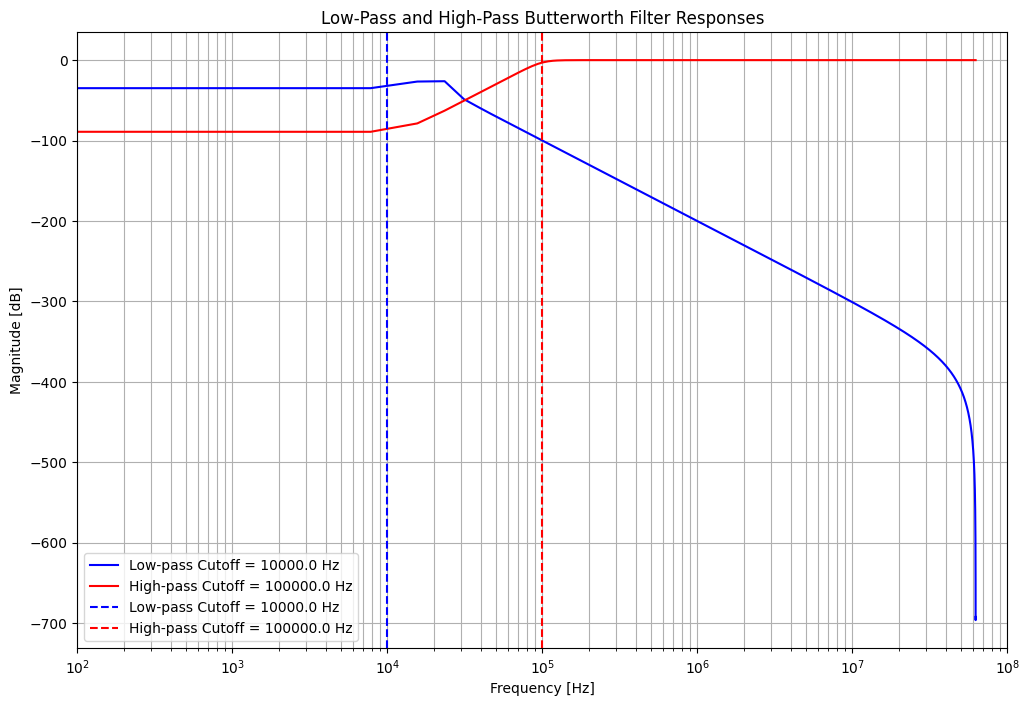

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, freqz

# Digital Butterworth lowpass filter design
def butter_lowpass_digital(cutoff_hz, fs, order=5):
    nyquist = 0.5 * fs  # Nyquist frequency
    normal_cutoff = cutoff_hz / nyquist  # Normalize the cutoff frequency
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Digital Butterworth highpass filter design
def butter_highpass_digital(cutoff_hz, fs, order=5):
    nyquist = 0.5 * fs  # Nyquist frequency
    normal_cutoff = cutoff_hz / nyquist  # Normalize the cutoff frequency
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

# Frequency response plot for both lowpass and highpass filters
def plot_filter_frequency_responses(lowpass_cutoff_hz, highpass_cutoff_hz, fs, order=5):
    # Low-pass filter response
    b_lp, a_lp = butter_lowpass_digital(lowpass_cutoff_hz, fs=fs, order=order)
    w_lp, h_lp = freqz(b_lp, a_lp, worN=8000)
    freq_hz_lp = w_lp * fs / (2 * np.pi)

    # High-pass filter response
    b_hp, a_hp = butter_highpass_digital(highpass_cutoff_hz, fs=fs, order=order)
    w_hp, h_hp = freqz(b_hp, a_hp, worN=8000)
    freq_hz_hp = w_hp * fs / (2 * np.pi)

    # Plot the frequency responses
    plt.figure(figsize=(12, 8))
    plt.semilogx(freq_hz_lp, 20 * np.log10(np.abs(h_lp)), color='blue', label=f'Low-pass Cutoff = {lowpass_cutoff_hz} Hz')
    plt.semilogx(freq_hz_hp, 20 * np.log10(np.abs(h_hp)), color='red', label=f'High-pass Cutoff = {highpass_cutoff_hz} Hz')

    # Configure the plot
    plt.title('Low-Pass and High-Pass Butterworth Filter Responses')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Magnitude [dB]')
    plt.grid(which='both', axis='both')
    plt.xlim(1e2, 1e8)  # Set x-axis to cover the range 1 Hz to 1e8 Hz
    plt.axvline(lowpass_cutoff_hz, color='blue', linestyle='--', label=f'Low-pass Cutoff = {lowpass_cutoff_hz} Hz')
    plt.axvline(highpass_cutoff_hz, color='red', linestyle='--', label=f'High-pass Cutoff = {highpass_cutoff_hz} Hz')
    plt.legend()
    plt.show()

# Filter settings
sample_frequency = 125000000  # Sample Frequency in Hz (125 MHz)
lowpass_cutoff = 1e4         # Low-pass cutoff frequency (100 kHz)
highpass_cutoff = 1e5        # High-pass cutoff frequency (3 kHz)
filter_order = 5              # Filter order

# Call the function to plot the frequency responses
plot_filter_frequency_responses(lowpass_cutoff, highpass_cutoff, fs=sample_frequency, order=filter_order)


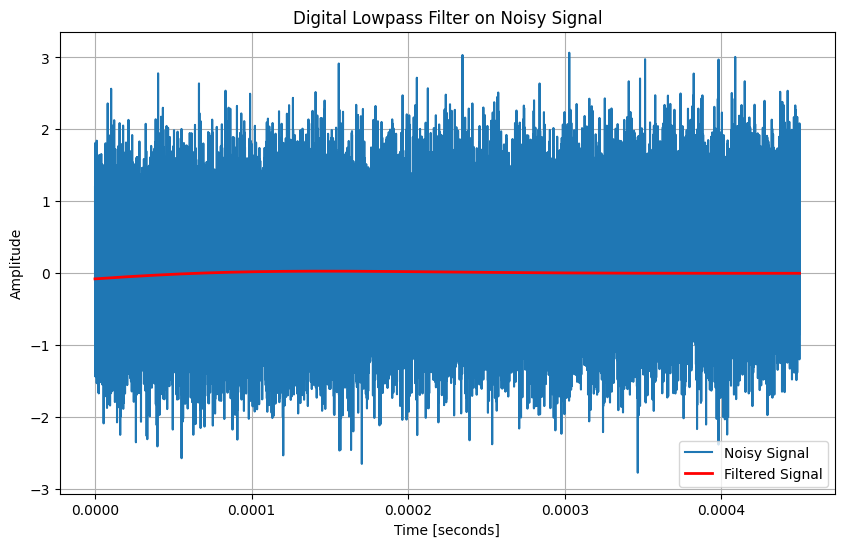

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Create a noisy sine wave signal
def create_noisy_signal(frequency, sample_rate, duration, noise_level=0.5):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    signal = np.sin(2 * np.pi * frequency * t)  # Clean sine wave
    noise = noise_level * np.random.normal(size=t.shape)  # Add Gaussian noise
    noisy_signal = signal + noise
    return t, noisy_signal

# Digital Butterworth lowpass filter design
def butter_lowpass(cutoff_hz, fs, order=5):
    nyquist = 0.5 * fs  # Nyquist frequency
    normal_cutoff = cutoff_hz / nyquist  # Normalize the cutoff frequency
    b, a = butter(order, normal_cutoff, btype='low', analog=False)  # Digital filter
    return b, a

# Apply the digital lowpass filter
def apply_lowpass_filter(data, cutoff_hz, fs, order=5):
    b, a = butter_lowpass(cutoff_hz, fs, order=order)
    y = filtfilt(b, a, data)  # Apply zero-phase filter
    return y

# Signal parameters
signal_frequency = 100    # Frequency of the sine wave in Hz
sample_rate = 125000000.0       # Sampling rate in Hz
duration = 0.000450             # Signal duration in seconds
noise_level = 0.7          # Amplitude of the added noise

# Filter parameters
lowpass_cutoff = 1000    # Cutoff frequency of the lowpass filter in Hz
filter_order = 4           # Order of the Butterworth filter

# Create a noisy signal
t, noisy_signal = create_noisy_signal(signal_frequency, sample_rate, duration, noise_level)

# Apply the digital lowpass filter to the noisy signal
filtered_signal = apply_lowpass_filter(noisy_signal, lowpass_cutoff, sample_rate, filter_order)

# Plot the noisy and filtered signal
plt.figure(figsize=(10, 6))
plt.plot(t, noisy_signal, label='Noisy Signal')
plt.plot(t, filtered_signal, color='red', label='Filtered Signal', linewidth=2)
plt.title('Digital Lowpass Filter on Noisy Signal')
plt.xlabel('Time [seconds]')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()
plt.show()


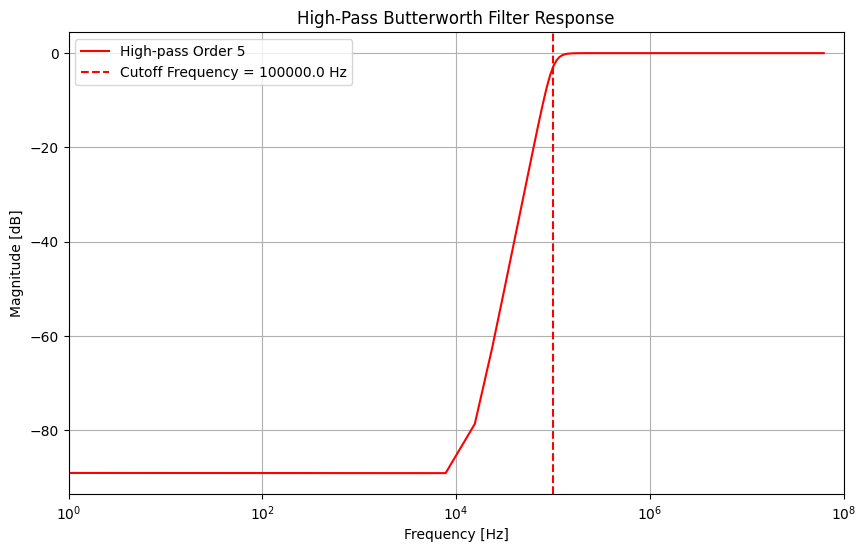

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, freqz

# Digital Butterworth highpass filter design
def butter_highpass_digital(cutoff_hz, fs, order=5):
    nyquist = 0.5 * fs  # Nyquist frequency
    normal_cutoff = cutoff_hz / nyquist  # Normalize the cutoff frequency
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

# Frequency response plot for the digital high-pass filter
def plot_highpass_frequency_response(cutoff_hz, fs, order=5):
    b, a = butter_highpass_digital(cutoff_hz, fs=fs, order=order)

    # Generate frequency response using freqz
    w, h = freqz(b, a, worN=8000)  # Use a large number of frequency points
    
    # Convert frequency to Hz
    freq_hz = w * fs / (2 * np.pi)
    
    # Plot the frequency response
    plt.figure(figsize=(10, 6))
    plt.semilogx(freq_hz, 20 * np.log10(np.abs(h)), color='red', label=f'High-pass Order {order}')

    # Configure the plot
    plt.title('High-Pass Butterworth Filter Response')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Magnitude [dB]')
    plt.grid(which='both', axis='both')
    plt.xlim(1, 1e8)  # Set x-axis to cover the range 1 Hz to 1e8 Hz
    plt.axvline(cutoff_hz, color='red', linestyle='--', label=f'Cutoff Frequency = {cutoff_hz} Hz')
    plt.legend()
    plt.show()

# Filter settings
sample_frequency = 125000000  # Sample Frequency in Hz (125 MHz)
highpass_cutoff = 1e5         # High-pass cutoff frequency (100 kHz)
filter_order = 5               # Filter order

# Call the function to plot the high-pass frequency response
plot_highpass_frequency_response(highpass_cutoff, fs=sample_frequency, order=filter_order)
